In [11]:
import pandas as pd


In [12]:
# Load Excel
df = pd.read_excel(r"C:\Users\User\Desktop\spotify\spotify.xlsx")

In [13]:
df.head()

,timestamp,platform,ms_played,conn_country,track_name,artist_name,album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,incognito_mode,Date,Time,Hour,Day Name,Month,Spotify Track ID
0,2024-01-02 12:21:36,android,100529,IN,Leo Das Entry BGM,ANUSHAN,Leo Das Entry BGM,spotify:track:5OEF6j1FQK5WxdRh81Hlqb,appload,endplay,False,True,False,2024-01-02,12:21:36,12,Tuesday,1,5OEF6j1FQK5WxdRh81Hlqb
1,2024-01-02 12:22:49,android,68005,IN,Harold Das Entry BGM,ANUSHAN,Harold Das Entry BGM,spotify:track:3ngGSbxB8mo6rM7D23thwH,fwdbtn,endplay,False,True,False,2024-01-02,12:22:49,12,Tuesday,1,3ngGSbxB8mo6rM7D23thwH
2,2024-01-02 12:24:01,android,39125,IN,"Glimpse of Harold Das (From ""Leo"")",Anirudh Ravichander,Glimpse of Harold Das,spotify:track:622DShHXxhC32wnAHbVpuK,clickrow,endplay,False,True,False,2024-01-02,12:24:01,12,Tuesday,1,622DShHXxhC32wnAHbVpuK
3,2024-01-02 12:26:53,android,114193,IN,Lokiverse 2.0,Anirudh Ravichander,Leo,spotify:track:5OxVOeYmIzelfupJtq1X6G,clickrow,trackdone,False,False,False,2024-01-02,12:26:53,12,Tuesday,1,5OxVOeYmIzelfupJtq1X6G
4,2024-01-02 12:27:47,android,53247,IN,Rolex Theme - Background Score,Anirudh Ravichander,Vikram,spotify:track:3Vb8KkT6Ub5fFGPYJCJyLh,trackdone,trackdone,False,False,False,2024-01-02,12:27:47,12,Tuesday,1,3Vb8KkT6Ub5fFGPYJCJyLh


In [14]:
# Check nulls
print(df.isnull().sum().sort_values(ascending=False))



Spotify Track ID     32
track_name           32
artist_name          32
album_name           32
spotify_track_uri    32
incognito_mode        0
Month                 0
Day Name              0
Hour                  0
Time                  0
Date                  0
timestamp             0
skipped               0
shuffle               0
platform              0
reason_start          0
conn_country          0
ms_played             0
reason_end            0
dtype: int64


In [15]:

# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28088 entries, 0 to 28087
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          28088 non-null  datetime64[ns]
 1   platform           28088 non-null  object        
 2   ms_played          28088 non-null  int64         
 3   conn_country       28088 non-null  object        
 4   track_name         28056 non-null  object        
 5   artist_name        28056 non-null  object        
 6   album_name         28056 non-null  object        
 7   spotify_track_uri  28056 non-null  object        
 8   reason_start       28088 non-null  object        
 9   reason_end         28088 non-null  object        
 10  shuffle            28088 non-null  bool          
 11  skipped            28088 non-null  bool          
 12  incognito_mode     28088 non-null  bool          
 13  Date               28088 non-null  datetime64[ns]
 14  Time  

In [16]:
# Drop rows where key track information is missing
df_clean = df.dropna(subset=[
    'track_name',
    'artist_name',
    'spotify_track_uri',
    'Spotify Track ID'
])

print(f"Cleaned Data Shape: {df_clean.shape}")


Cleaned Data Shape: (28056, 19)


In [18]:
# Listening time stats
df_clean['minutes_played'] = df_clean['ms_played'] / 60000
print(df_clean['minutes_played'].describe())

# Top artists
top_artists = df_clean['artist_name'].value_counts().head(10)
print(top_artists)

# Top songs
top_songs = df_clean['track_name'].value_counts().head(10)
print(top_songs)

# Listening by day
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
daily_listens = df_clean.groupby('Date')['minutes_played'].sum()

# Listening by hour
hourly = df_clean.groupby('Hour')['minutes_played'].sum()


count    28056.000000
mean         3.329403
std          1.125856
min          0.500067
25%          2.811100
50%          3.376392
75%          3.918533
max         16.299167
Name: minutes_played, dtype: float64
artist_name
The Score              2461
Anirudh Ravichander    1800
One Direction          1105
Arctic Monkeys         1077
Taylor Swift            909
Shawn Mendes            740
5 Seconds of Summer     691
Pritam                  532
Brodha V                497
A.R. Rahman             431
Name: count, dtype: int64
track_name
Do I Wanna Know?                                                                                      134
Born For This                                                                                         112
R U Mine?                                                                                             100
Popular (with Playboi Carti & Madonna) - From The Idol Vol. 1 (Music from the HBO Original Series)     97
Aigiri Nandini                    

C:\Users\User\AppData\Local\Temp\ipykernel_16884\2791300810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['minutes_played'] = df_clean['ms_played'] / 60000
C:\Users\User\AppData\Local\Temp\ipykernel_16884\2791300810.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'])


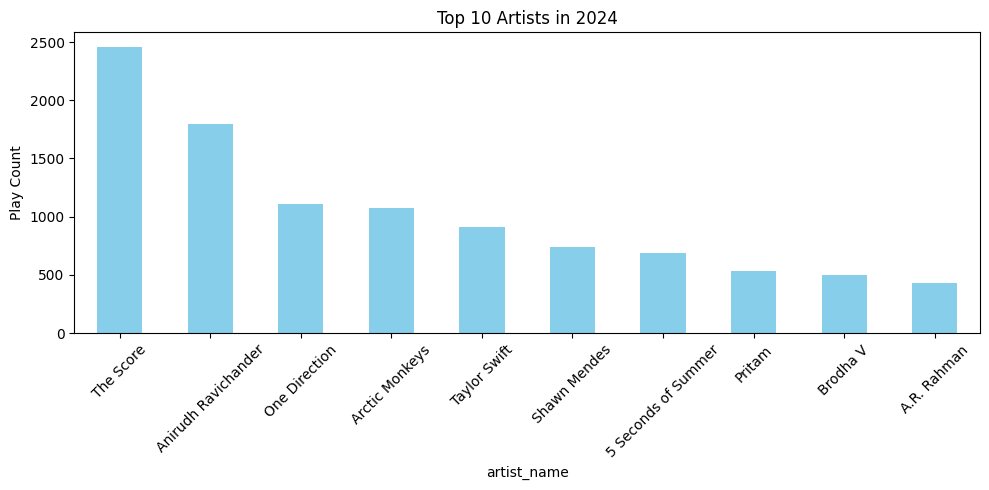

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top artists barplot
plt.figure(figsize=(10,5))
top_artists.plot(kind='bar', color='skyblue')
plt.title("Top 10 Artists in 2024")
plt.ylabel("Play Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
# Check nulls
print(df_clean.isnull().sum().sort_values(ascending=False))


timestamp            0
platform             0
Spotify Track ID     0
Month                0
Day Name             0
Hour                 0
Time                 0
Date                 0
incognito_mode       0
skipped              0
shuffle              0
reason_end           0
reason_start         0
spotify_track_uri    0
album_name           0
artist_name          0
track_name           0
conn_country         0
ms_played            0
minutes_played       0
dtype: int64


In [21]:
# Already existing ones — just to ensure
df_clean['minutes_played'] = df_clean['ms_played'] / 60000


C:\Users\User\AppData\Local\Temp\ipykernel_16884\2515552243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['minutes_played'] = df_clean['ms_played'] / 60000


In [22]:

# Week number
df_clean['week'] = df_clean['Date'].dt.isocalendar().week


C:\Users\User\AppData\Local\Temp\ipykernel_16884\3992568089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['week'] = df_clean['Date'].dt.isocalendar().week


In [23]:

# Listening session category (morning/evening/night)
def session_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_clean['session'] = df_clean['Hour'].apply(session_period)


C:\Users\User\AppData\Local\Temp\ipykernel_16884\970427820.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['session'] = df_clean['Hour'].apply(session_period)


In [25]:
df_clean.head(20)

,timestamp,platform,ms_played,conn_country,track_name,artist_name,album_name,spotify_track_uri,reason_start,reason_end,...,incognito_mode,Date,Time,Hour,Day Name,Month,Spotify Track ID,minutes_played,week,session
0,2024-01-02 12:21:36,android,100529,IN,Leo Das Entry BGM,ANUSHAN,Leo Das Entry BGM,spotify:track:5OEF6j1FQK5WxdRh81Hlqb,appload,endplay,...,False,2024-01-02,12:21:36,12,Tuesday,1,5OEF6j1FQK5WxdRh81Hlqb,1.675483,1,Afternoon
1,2024-01-02 12:22:49,android,68005,IN,Harold Das Entry BGM,ANUSHAN,Harold Das Entry BGM,spotify:track:3ngGSbxB8mo6rM7D23thwH,fwdbtn,endplay,...,False,2024-01-02,12:22:49,12,Tuesday,1,3ngGSbxB8mo6rM7D23thwH,1.133417,1,Afternoon
2,2024-01-02 12:24:01,android,39125,IN,"Glimpse of Harold Das (From ""Leo"")",Anirudh Ravichander,Glimpse of Harold Das,spotify:track:622DShHXxhC32wnAHbVpuK,clickrow,endplay,...,False,2024-01-02,12:24:01,12,Tuesday,1,622DShHXxhC32wnAHbVpuK,0.652083,1,Afternoon
3,2024-01-02 12:26:53,android,114193,IN,Lokiverse 2.0,Anirudh Ravichander,Leo,spotify:track:5OxVOeYmIzelfupJtq1X6G,clickrow,trackdone,...,False,2024-01-02,12:26:53,12,Tuesday,1,5OxVOeYmIzelfupJtq1X6G,1.903217,1,Afternoon
4,2024-01-02 12:27:47,android,53247,IN,Rolex Theme - Background Score,Anirudh Ravichander,Vikram,spotify:track:3Vb8KkT6Ub5fFGPYJCJyLh,trackdone,trackdone,...,False,2024-01-02,12:27:47,12,Tuesday,1,3Vb8KkT6Ub5fFGPYJCJyLh,0.887450,1,Afternoon
5,2024-01-02 12:29:40,android,106495,IN,Sandhanam Theme - Background Score,Anirudh Ravichander,Vikram,spotify:track:525NKU3UFgZQtCXWBWE0al,trackdone,endplay,...,False,2024-01-02,12:29:40,12,Tuesday,1,525NKU3UFgZQtCXWBWE0al,1.774917,1,Afternoon
6,2024-01-02 16:45:56,android,96926,IN,Leo Das Entry BGM,ANUSHAN,Leo Das Entry BGM,spotify:track:5OEF6j1FQK5WxdRh81Hlqb,clickrow,fwdbtn,...,False,2024-01-02,16:45:56,16,Tuesday,1,5OEF6j1FQK5WxdRh81Hlqb,1.615433,1,Afternoon
7,2024-01-02 16:52:07,android,371790,IN,Bekhayali,Sachet Tandon,Kabir Singh,spotify:track:4yMbbysldl7E3WgiaugnwM,fwdbtn,trackdone,...,False,2024-01-02,16:52:07,16,Tuesday,1,4yMbbysldl7E3WgiaugnwM,6.196500,1,Afternoon
8,2024-01-02 16:55:20,android,191151,IN,Kabhi Kabhi Aditi,Rashid Ali,Jaane Tu... Ya Jaane Na,spotify:track:3APdIdF8H0jsxSuGOqXedS,trackdone,fwdbtn,...,False,2024-01-02,16:55:20,16,Tuesday,1,3APdIdF8H0jsxSuGOqXedS,3.185850,1,Afternoon
9,2024-01-02 16:59:02,android,223271,IN,"Rangisari (From ""Jugjugg Jeeyo"")",Kanishk Seth,"Rangisari (From ""Jugjugg Jeeyo"")",spotify:track:0DXfJ2iKRDEG7rPgssWFea,fwdbtn,trackdone,...,False,2024-01-02,16:59:02,16,Tuesday,1,0DXfJ2iKRDEG7rPgssWFea,3.721183,1,Afternoon


In [26]:
artist_playtime = df_clean.groupby('artist_name')['minutes_played'].sum().sort_values(ascending=False).head(10)
print(artist_playtime)


artist_name
The Score              7259.182683
Anirudh Ravichander    5663.137700
One Direction          3527.504933
Arctic Monkeys         3463.859667
Taylor Swift           3190.238150
Shawn Mendes           2231.393633
5 Seconds of Summer    2155.703117
Pritam                 2112.576100
A.R. Rahman            1907.961933
Brodha V               1621.760883
Name: minutes_played, dtype: float64


In [27]:
song_playtime = df_clean.groupby('track_name')['minutes_played'].sum().sort_values(ascending=False).head(10)
print(song_playtime)


track_name
Do I Wanna Know?                                                                                      564.352433
Born For This                                                                                         403.490133
R U Mine?                                                                                             317.970267
Popular (with Playboi Carti & Madonna) - From The Idol Vol. 1 (Music from the HBO Original Series)    316.596233
Aigiri Nandini                                                                                        313.121833
Knee Socks                                                                                            305.709617
In My Blood                                                                                           289.547850
Revolution                                                                                            288.944133
Fear Song (From "Devara Part 1") [Telugu]                                            

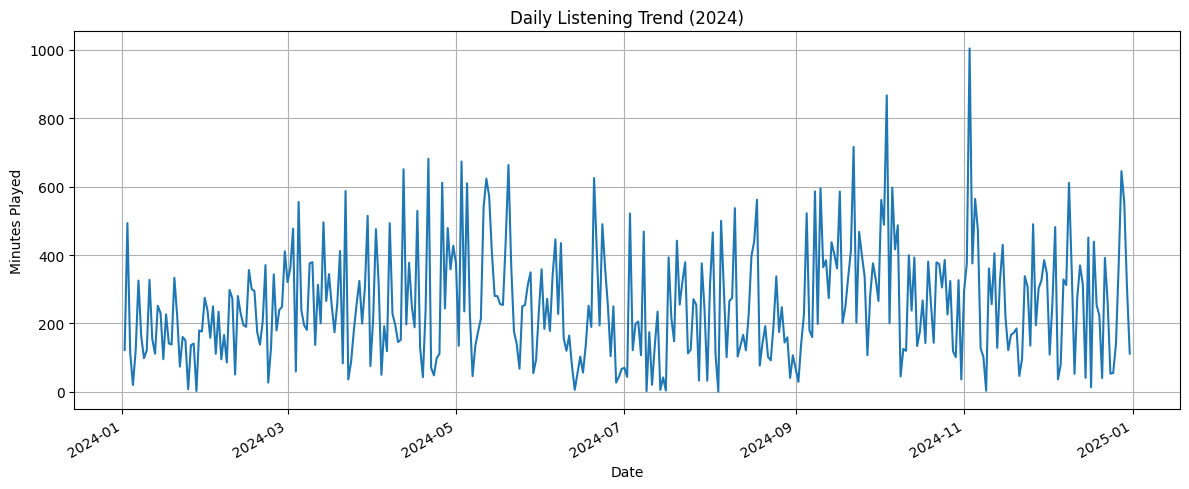

In [28]:
daily_trend = df_clean.groupby('Date')['minutes_played'].sum()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
daily_trend.plot()
plt.title("Daily Listening Trend (2024)")
plt.ylabel("Minutes Played")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
df.tail()

,timestamp,platform,ms_played,conn_country,track_name,artist_name,album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,incognito_mode,Date,Time,Hour,Day Name,Month,Spotify Track ID
28083,2024-12-31 14:21:50,ios,34023,IN,Nee Neeli Kannullona,Gowtham Bharadwaj,Dear Comrade,spotify:track:2yu7RgQlNTwvyUPk7lsD9j,trackdone,fwdbtn,True,True,False,2024-12-31,14:21:50,14,Tuesday,12,2yu7RgQlNTwvyUPk7lsD9j
28084,2024-12-31 14:22:41,ios,50197,IN,My Universe,Coldplay,My Universe,spotify:track:3FeVmId7tL5YN8B7R3imoM,fwdbtn,fwdbtn,True,True,False,2024-12-31,14:22:41,14,Tuesday,12,3FeVmId7tL5YN8B7R3imoM
28085,2024-12-31 14:24:51,ios,126954,IN,State Of Grace (Taylor's Version),Taylor Swift,Red (Taylor's Version),spotify:track:5lFDIbYMcFHPPgzMcnPqSz,fwdbtn,fwdbtn,True,True,False,2024-12-31,14:24:51,14,Tuesday,12,5lFDIbYMcFHPPgzMcnPqSz
28086,2024-12-31 14:25:46,ios,51818,IN,All For Love,Tungevaag,All For Love,spotify:track:5VGBgPVFO3e0lWz4WHYntQ,backbtn,fwdbtn,True,True,False,2024-12-31,14:25:46,14,Tuesday,12,5VGBgPVFO3e0lWz4WHYntQ
28087,2024-12-31 14:33:29,ios,192320,IN,Unwritten - sped up,sped up + slowed,Unwritten,spotify:track:3YfN4FJ9k10ZQFFrZEZsz9,fwdbtn,logout,True,False,False,2024-12-31,14:33:29,14,Tuesday,12,3YfN4FJ9k10ZQFFrZEZsz9


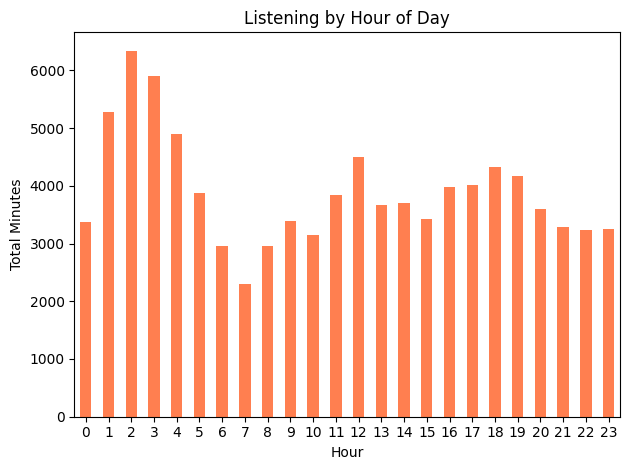

In [30]:
hourly_trend = df_clean.groupby('Hour')['minutes_played'].sum()

hourly_trend.plot(kind='bar', color='coral')
plt.title("Listening by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Total Minutes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [31]:
skip_counts = df_clean['skipped'].value_counts()
print(skip_counts)

# Skip rate by artist
artist_skips = df_clean.groupby('artist_name')['skipped'].mean().sort_values(ascending=False).head(10)
print(artist_skips)


skipped
False    25082
True      2974
Name: count, dtype: int64
artist_name
DaBaby                  1.0
Gagni Porwal            1.0
Greenred Productions    1.0
Mallikarjun             1.0
Aroob Khan              1.0
Mary J. Blige           1.0
Geek Music              1.0
DRAM                    1.0
Mike Posner             1.0
Mitski                  1.0
Name: skipped, dtype: float64


In [32]:
shuffle_counts = df_clean['shuffle'].value_counts()
print(shuffle_counts)


shuffle
True     19324
False     8732
Name: count, dtype: int64


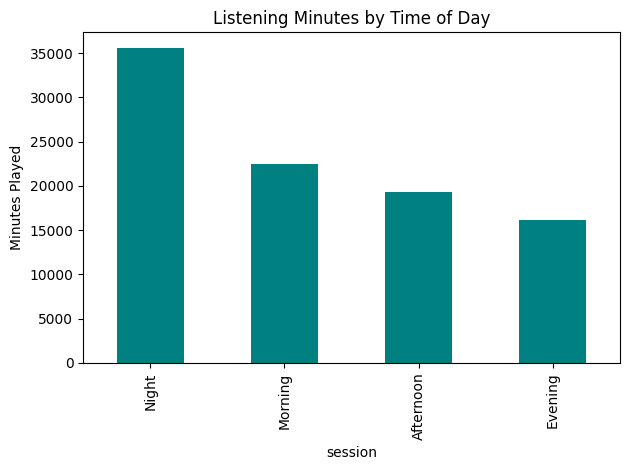

In [33]:
session_stats = df_clean.groupby('session')['minutes_played'].sum().sort_values(ascending=False)
session_stats.plot(kind='bar', color='teal')
plt.title("Listening Minutes by Time of Day")
plt.ylabel("Minutes Played")
plt.tight_layout()
plt.show()


In [34]:
df_clean.to_csv("C:/Users/User/Desktop/spotify/df_cleaned_final.csv", index=False)


In [39]:
df_clean.drop(columns=['timestamp'], inplace=True)


In [40]:
df_clean.head()


,platform,ms_played,conn_country,track_name,artist_name,album_name,spotify_track_uri,reason_start,reason_end,shuffle,...,incognito_mode,Date,Time,Hour,Day Name,Month,Spotify Track ID,minutes_played,week,session
0,android,100529,IN,Leo Das Entry BGM,ANUSHAN,Leo Das Entry BGM,spotify:track:5OEF6j1FQK5WxdRh81Hlqb,appload,endplay,False,...,False,2024-01-02,12:21:36,12,Tuesday,1,5OEF6j1FQK5WxdRh81Hlqb,1.675483,1,Afternoon
1,android,68005,IN,Harold Das Entry BGM,ANUSHAN,Harold Das Entry BGM,spotify:track:3ngGSbxB8mo6rM7D23thwH,fwdbtn,endplay,False,...,False,2024-01-02,12:22:49,12,Tuesday,1,3ngGSbxB8mo6rM7D23thwH,1.133417,1,Afternoon
2,android,39125,IN,"Glimpse of Harold Das (From ""Leo"")",Anirudh Ravichander,Glimpse of Harold Das,spotify:track:622DShHXxhC32wnAHbVpuK,clickrow,endplay,False,...,False,2024-01-02,12:24:01,12,Tuesday,1,622DShHXxhC32wnAHbVpuK,0.652083,1,Afternoon
3,android,114193,IN,Lokiverse 2.0,Anirudh Ravichander,Leo,spotify:track:5OxVOeYmIzelfupJtq1X6G,clickrow,trackdone,False,...,False,2024-01-02,12:26:53,12,Tuesday,1,5OxVOeYmIzelfupJtq1X6G,1.903217,1,Afternoon
4,android,53247,IN,Rolex Theme - Background Score,Anirudh Ravichander,Vikram,spotify:track:3Vb8KkT6Ub5fFGPYJCJyLh,trackdone,trackdone,False,...,False,2024-01-02,12:27:47,12,Tuesday,1,3Vb8KkT6Ub5fFGPYJCJyLh,0.887450,1,Afternoon


In [41]:
df_clean.to_csv(r"C:/Users/User/Desktop/spotify/df_cleaned_final_no_timestamp.csv", index=False)
